In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('NY-House-Dataset.csv')
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [29]:
most_expensive_apartment = df.loc[df['PRICE'].idxmax()]
least_expensive_apartment = df.loc[df['PRICE'].idxmin()]
print(most_expensive_apartment)


BROKERTITLE                              Brokered by ANNE LOPA REAL ESTATE
TYPE                                                        House for sale
PRICE                                                           2147483647
BEDS                                                                     7
BATH                                                                   6.0
PROPERTYSQFT                                                       10000.0
ADDRESS                                                 6659-6675 Amboy Rd
STATE                                                   New York, NY 10309
MAIN_ADDRESS                          6659-6675 Amboy RdNew York, NY 10309
ADMINISTRATIVE_AREA_LEVEL_2                                  United States
LOCALITY                                                          New York
SUBLOCALITY                                                Richmond County
STREET_NAME                                                  Staten Island
LONG_NAME                

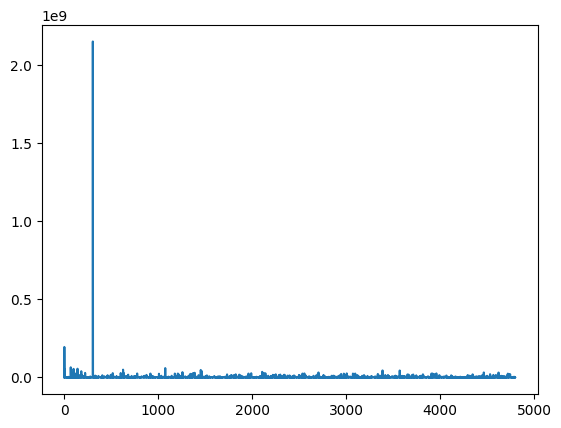

In [30]:
plt.plot(df['PRICE'])

Based on our observations, it seems that the most expensive house in the dataset is a house in staten island. When we look at the adress on google maps and try to see what the house looks like we find that this price is likely an error and when we plot the prices we get a confirmation.

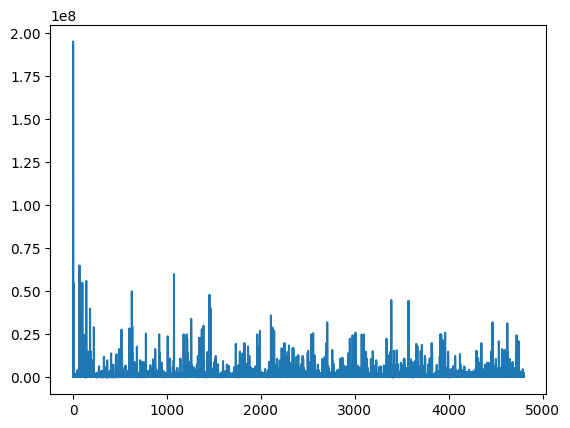

In [31]:
df.drop(df[df['PRICE'] > 1000000000].index, inplace = True)
plt.plot(df['PRICE'])

In [32]:
df['PROPERTYSQFT'] = df['PROPERTYSQFT']/10.764
df.rename(columns={'PROPERTYSQFT': 'PROPERTYSQM'}, inplace=True)


BROKERTITLE                                                  Brokered by Serhant
TYPE                                                              Condo for sale
PRICE                                                                  195000000
BEDS                                                                           7
BATH                                                                        10.0
PROPERTYSQM                                                          1629.970271
ADDRESS                        Central Park Tower Penthouse-217 W 57th New Yo...
STATE                                                         New York, NY 10019
MAIN_ADDRESS                   Central Park Tower Penthouse-217 W 57th New Yo...
ADMINISTRATIVE_AREA_LEVEL_2                                        United States
LOCALITY                                                                New York
SUBLOCALITY                                                      New York County
STREET_NAME                 

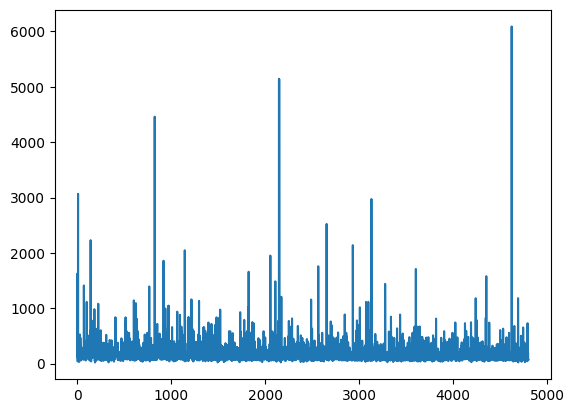

In [33]:
most_expensive_apartment = df.loc[df['PRICE'].idxmax()]
smallest_apartment = df.loc[df['PROPERTYSQM'].idxmin()]
print(most_expensive_apartment)
plt.plot(df['PROPERTYSQM'])
print (df['PROPERTYSQM'].head(100))

             PRICE  PROPERTYSQM
PRICE         1.00         0.41
PROPERTYSQM   0.41         1.00


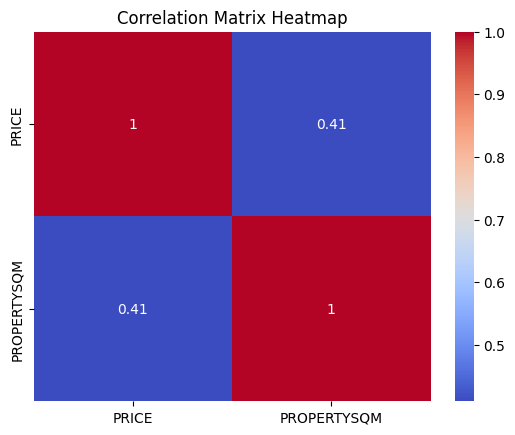

In [34]:
correlation_matrix = df[['PRICE', 'PROPERTYSQM']].corr().round(2)
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [35]:
df['PRICE_PER_SQM'] = df['PRICE']/df['PROPERTYSQM']

In [36]:
threshold = 150
big_apartments = df.loc[df['PROPERTYSQM'] > threshold]
small_apartments = df.loc[df['PROPERTYSQM'] <= threshold]

avg_big_apartments = big_apartments['PRICE_PER_SQM'].mean()
avg_small_apartments = small_apartments['PRICE_PER_SQM'].mean()

print('Average price of big apartments: ', avg_big_apartments)
print('Average price of small apartments: ', avg_small_apartments)


Average price of big apartments:  8901.207803669886
Average price of small apartments:  7437.467793825542


We can see that the price per sq m² is higher in big appartments

BROKERTITLE
Brokered by Blue Key Real Estate Brokerage                  1.100000e+07
Brokered by Brown Harris Stevens - 43 North Moore Street    1.554633e+07
Brokered by Douglas Elliman - New Development               4.000000e+07
Brokered by EVERGREEN REALTY & INVESTMENTS                  3.150000e+07
Brokered by New York Residence                              1.200000e+07
Brokered by Reserve                                         3.200000e+07
Name: PRICE, dtype: float64


<BarContainer object of 6 artists>

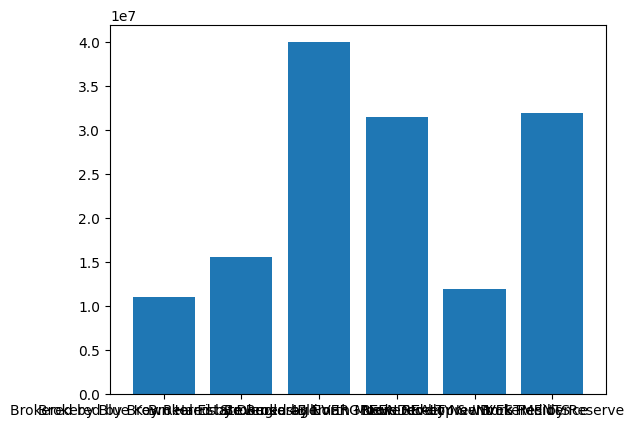

In [37]:


average_price_per_broker = df.groupby('BROKERTITLE')['PRICE'].mean()

filtered_brokers = average_price_per_broker[average_price_per_broker > 10000000]
print(filtered_brokers)

plt.bar(filtered_brokers.index, filtered_brokers.values)



In [38]:
most_expensive_apartment_perSQM = df.loc[df['PRICE_PER_SQM'].idxmax()]
print(most_expensive_apartment_perSQM)

BROKERTITLE                                         Brokered by COMPASS
TYPE                                                     Co-op for sale
PRICE                                                          60000000
BEDS                                                                  8
BATH                                                                8.0
PROPERTYSQM                                                  202.917862
ADDRESS                                             960 5th Ave Unit 12
STATE                                               Manhattan, NY 10075
MAIN_ADDRESS                     960 5th Ave Unit 12Manhattan, NY 10075
ADMINISTRATIVE_AREA_LEVEL_2                                    New York
LOCALITY                                                New York County
SUBLOCALITY                                                    New York
STREET_NAME                                                   Manhattan
LONG_NAME                                                       

In [39]:
average_price_per_locality = df.groupby('LOCALITY')['PRICE'].mean()

most_expensive_locality = average_price_per_locality.idxmax()
cheapest_locality = average_price_per_locality.idxmin()

print('Most expensive locality: ', most_expensive_locality)
print('average price : ',average_price_per_locality[most_expensive_locality])

print('Cheapest locality: ', cheapest_locality)
print("average price : ",average_price_per_locality[cheapest_locality])


Most expensive locality:  New York County
average price :  2579619.2298263535
Cheapest locality:  The Bronx
average price :  330600.0


In [40]:
variance_price_per_locality = df.groupby('LOCALITY')['PRICE'].var()
variance_price_per_locality_perSQM = df.groupby('LOCALITY')['PRICE_PER_SQM'].var()

most_volatile_locality = variance_price_per_locality.idxmax()
least_volatile_locality = variance_price_per_locality.idxmin()

most_volatile_locality_perSQM = variance_price_per_locality_perSQM.idxmax()
least_volatile_locality_perSQM = variance_price_per_locality_perSQM.idxmin()

print('Most volatile locality: ', most_volatile_locality)
print('Least volatile locality: ', least_volatile_locality)

print('Most volatile locality perSQM: ', most_volatile_locality_perSQM)
print('Least volatile locality perSQM: ', least_volatile_locality_perSQM)


Most volatile locality:  New York
Least volatile locality:  The Bronx
Most volatile locality perSQM:  New York County
Least volatile locality perSQM:  The Bronx


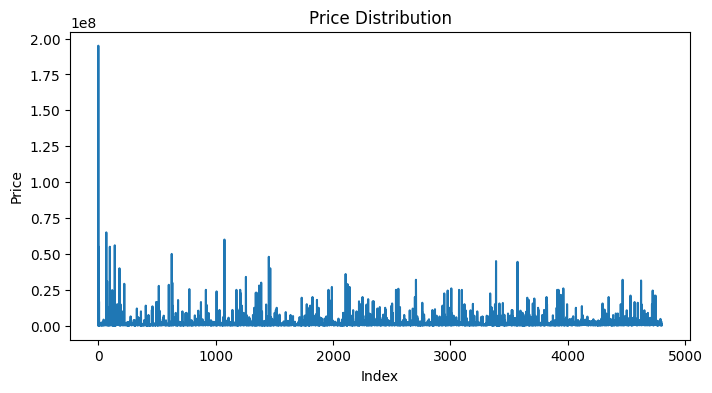

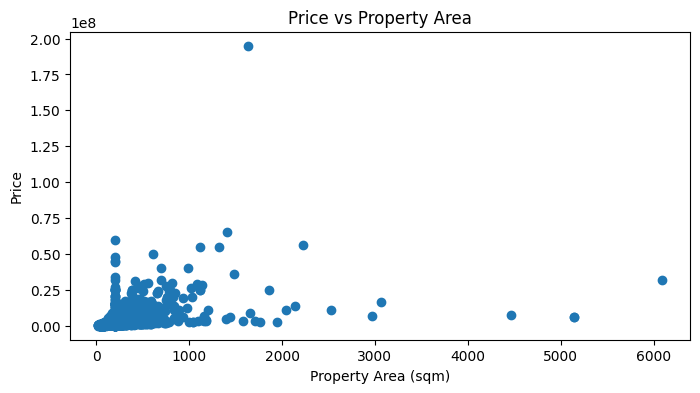

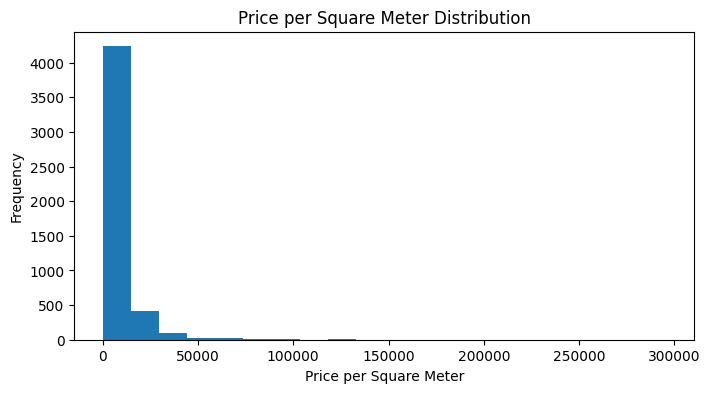

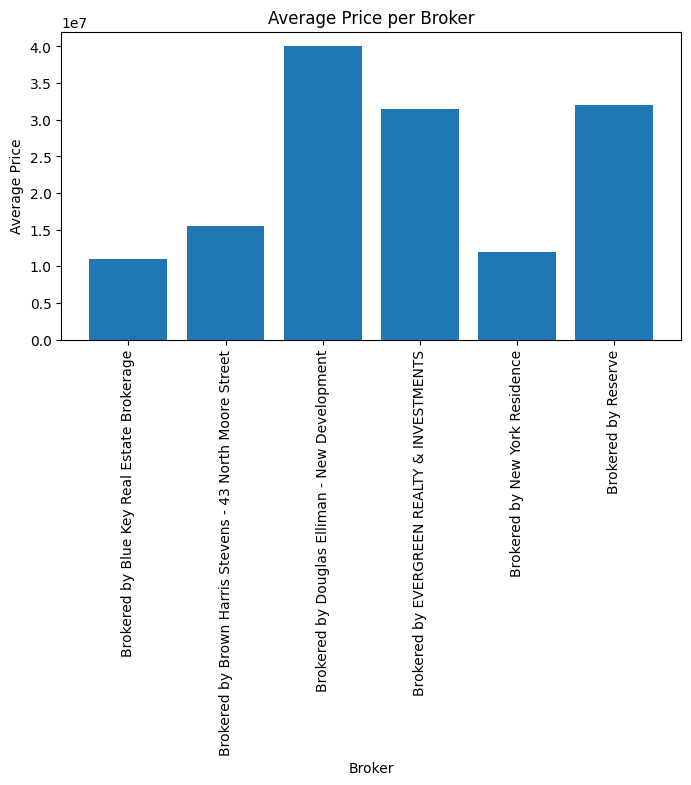

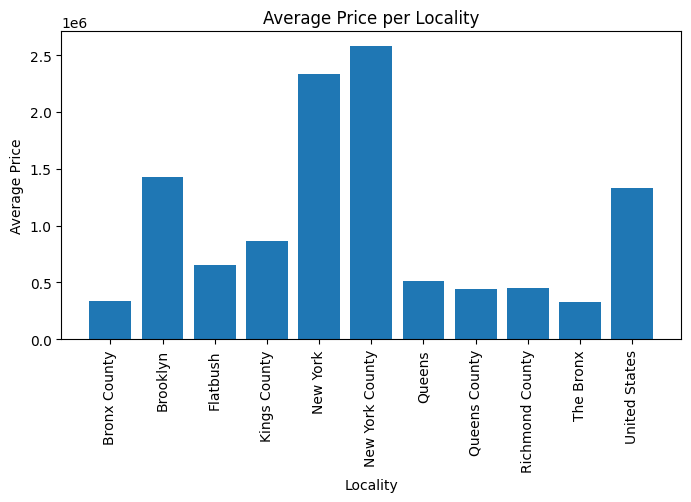

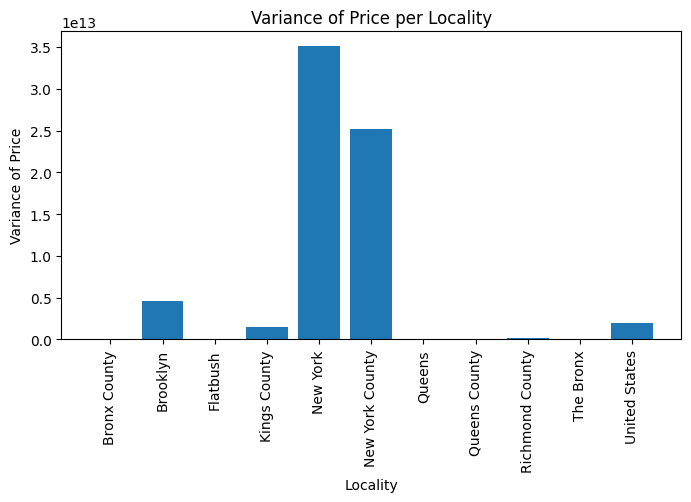

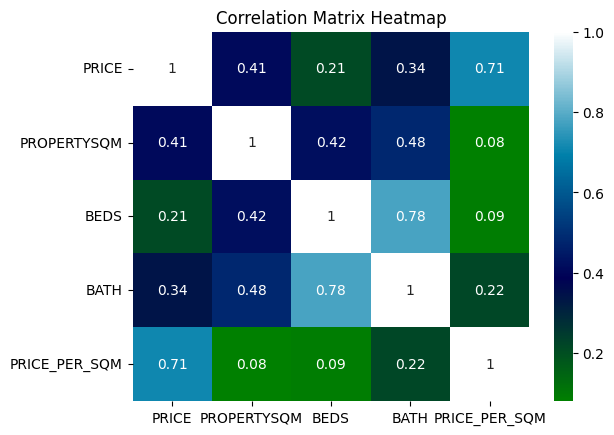

In [41]:
# Plot 1
plt.figure(figsize=(8, 4))
plt.plot(df['PRICE'])
plt.title('Price Distribution')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

# Plot 2
plt.figure(figsize=(8, 4))
plt.scatter(df['PROPERTYSQM'], df['PRICE'])
plt.title('Price vs Property Area')
plt.xlabel('Property Area (sqm)')
plt.ylabel('Price')
plt.show()

# Plot 3
plt.figure(figsize=(8, 4))
plt.hist(df['PRICE_PER_SQM'], bins=20)
plt.title('Price per Square Meter Distribution')
plt.xlabel('Price per Square Meter')
plt.ylabel('Frequency')
plt.show()

# Plot 4
plt.figure(figsize=(8, 4))
plt.bar(filtered_brokers.index, filtered_brokers.values)
plt.title('Average Price per Broker')
plt.xlabel('Broker')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Plot 5
plt.figure(figsize=(8, 4))
plt.bar(average_price_per_locality.index, average_price_per_locality.values)
plt.title('Average Price per Locality')
plt.xlabel('Locality')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Plot 6
plt.figure(figsize=(8, 4))
plt.bar(variance_price_per_locality.index, variance_price_per_locality.values)
plt.title('Variance of Price per Locality')
plt.xlabel('Locality')
plt.ylabel('Variance of Price')
plt.xticks(rotation=90)
plt.show()


correration_matrix = df[['PRICE', 'PROPERTYSQM','BEDS','BATH','PRICE_PER_SQM']].corr().round(2)
sns.heatmap(correration_matrix, annot=True, cmap='ocean')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
#We select the useful columns
selected_columns = ["BEDS", "BATH", "PRICE_PER_SQM", "TYPE", "SUBLOCALITY", "PRICE"]
df_selected = df[selected_columns]

In [43]:
#The librairies we will be using
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree

In [44]:
# Perform one-hot encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(df_selected[['TYPE', 'SUBLOCALITY']]))
X_encoded.columns = encoder.get_feature_names_out(['TYPE', 'SUBLOCALITY'])


# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ["BEDS", "BATH", "PRICE_PER_SQM"]
X_numerical = df_selected[numerical_columns]
X_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_numerical), columns=numerical_columns)
# Concatenate
X = pd.concat([X_encoded,X_numerical_scaled], axis=1)
y = df_selected["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [46]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

In [47]:
y_log = np.log(y_train)
linear_model_log = LinearRegression()
linear_model_log.fit(X_train, y_log)

LinearRegression()

In [48]:
coefficients_log = linear_model_log.coef_
intercept_log = linear_model_log.intercept_


In [49]:
y_log_test = np.log(y_test)
predictions_log = linear_model_log.predict(X_test)
mse_log = mean_squared_error(y_log_test, predictions_log)

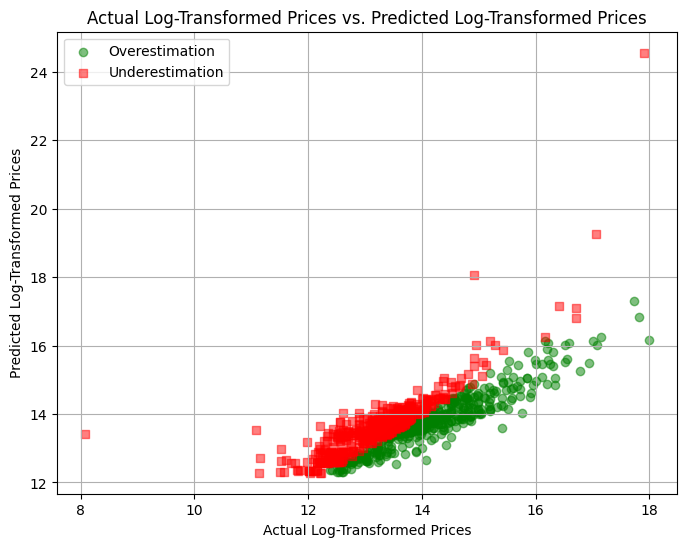

In [50]:
colors = np.where(y_log_test > predictions_log, 'g', 'r')

plt.figure(figsize=(8, 6))

plt.scatter(y_log_test[colors == 'g'], predictions_log[colors == 'g'], alpha=0.5, c='g', marker='o', label='Overestimation')

plt.scatter(y_log_test[colors == 'r'], predictions_log[colors == 'r'], alpha=0.5, c='r', marker='s', label='Underestimation')

plt.title('Actual Log-Transformed Prices vs. Predicted Log-Transformed Prices')
plt.xlabel('Actual Log-Transformed Prices')
plt.ylabel('Predicted Log-Transformed Prices')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
print("Linear Regression Coefficients:", coefficients)
print("Linear Regression Intercept:", intercept)
print("\nLinear Regression (Log-Transformed) Coefficients:", coefficients_log)
print("Linear Regression (Log-Transformed) Intercept:", intercept_log)
print("MSE of Log-Transformed Model:", mse_log)

Linear Regression Coefficients: [-2.10387491e+05 -3.91983684e+05  7.23100289e+05 -1.91067839e+05
 -7.97919325e+05  3.36676244e+05 -6.08987981e+04 -8.76328632e+04
 -3.49245965e-10 -4.69445178e+05 -3.45029254e+04  2.83936256e+05
 -2.46809704e+05 -1.17571518e+06 -1.61676520e+05  2.25554686e-10
  1.04773790e-09  2.98428862e+05 -7.27475524e+05  4.75439440e+04
 -1.26241617e+05 -7.91558894e+05 -2.03255613e+05  3.16784561e+06
  1.44298157e+05 -1.67000159e+05  1.76439836e+04 -1.56804320e+05
 -1.33469194e+04  1.27074715e+05  2.38081943e+05  1.71905019e+05
 -3.00618435e+04  8.97318112e+05  3.05628870e+06]
Linear Regression Intercept: 1959767.3299453482

Linear Regression (Log-Transformed) Coefficients: [-5.74852362e-02  4.32839640e-01  2.47916707e-01  2.57734521e-01
  1.11981363e-01  2.52074681e-01  4.71410171e-01  9.59225564e-02
 -1.11022302e-16  5.09985946e-01  3.42309264e-01  7.43494051e-01
  5.41935259e-02  2.96192962e-01 -1.97098462e-01  2.22044605e-16
  8.67361738e-17  7.28450162e-02  3.386

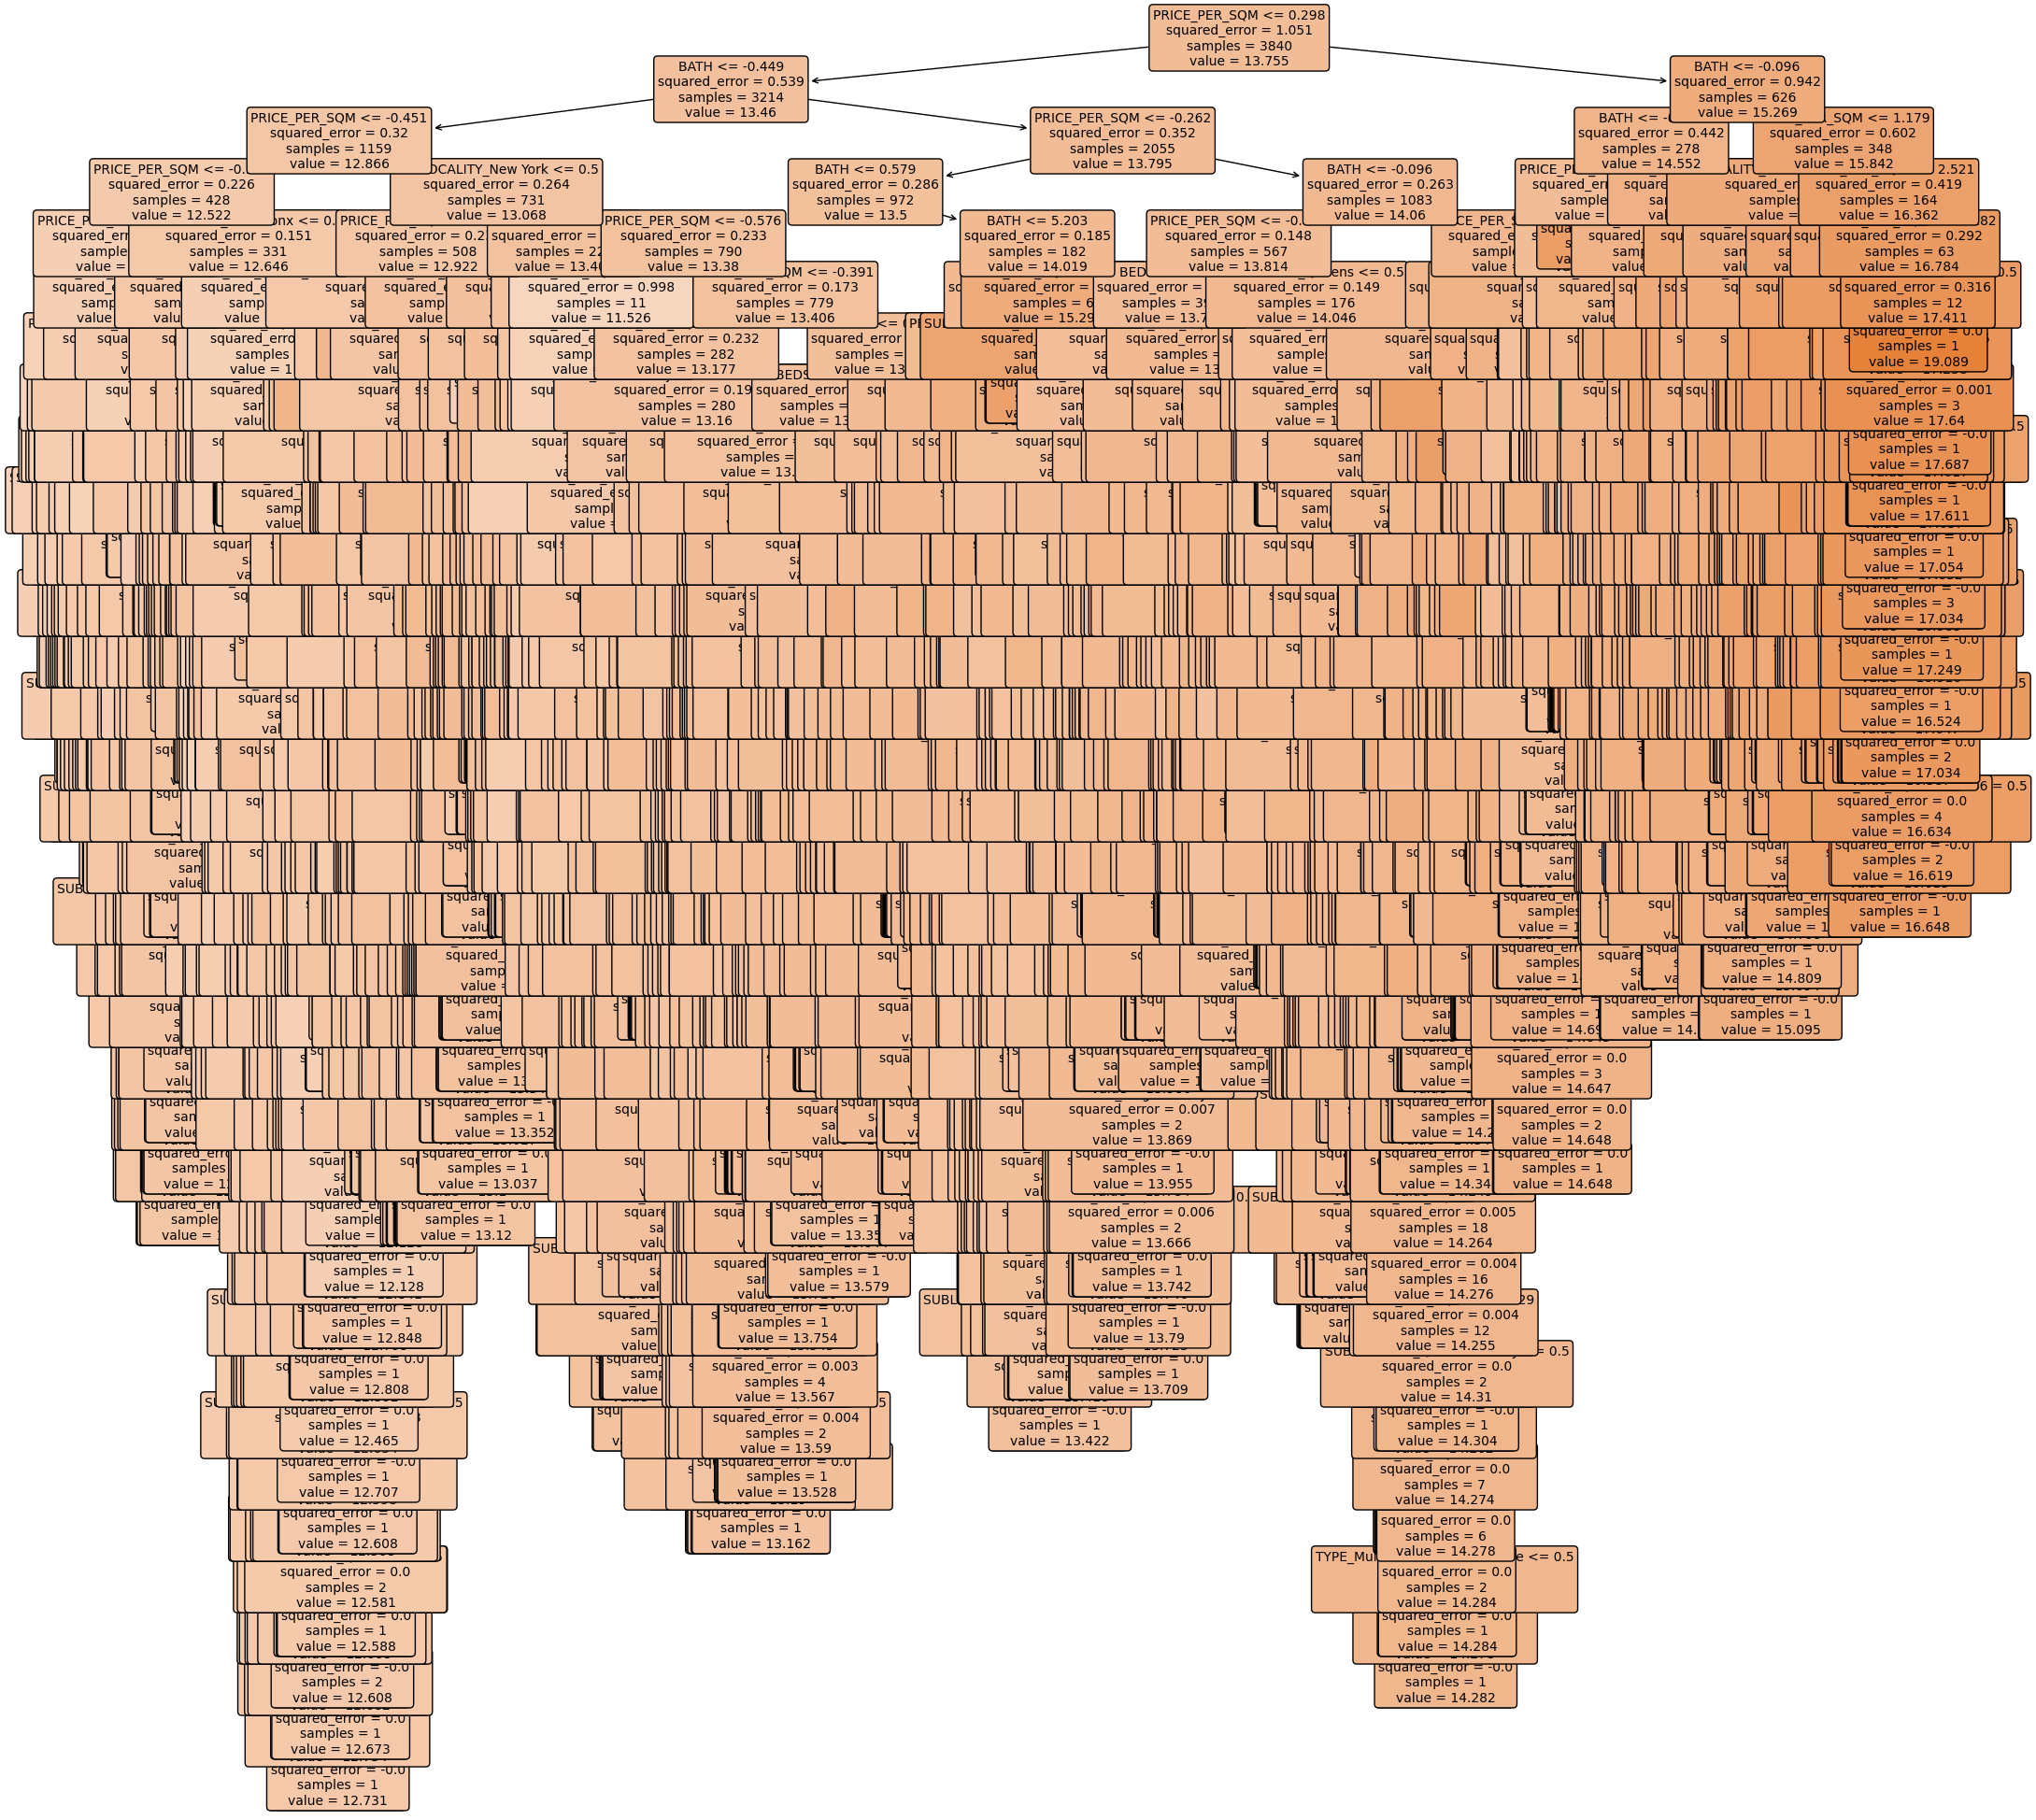

Mean Squared Error of Decision Tree Model: 0.17401203866086776


In [52]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_log)

feature_names = list(X_train.columns)

plt.figure(figsize=(25, 25))
tree.plot_tree(tree_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.show()
predictions_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_log_test, predictions_tree)

print("Mean Squared Error of Decision Tree Model:", mse_tree)

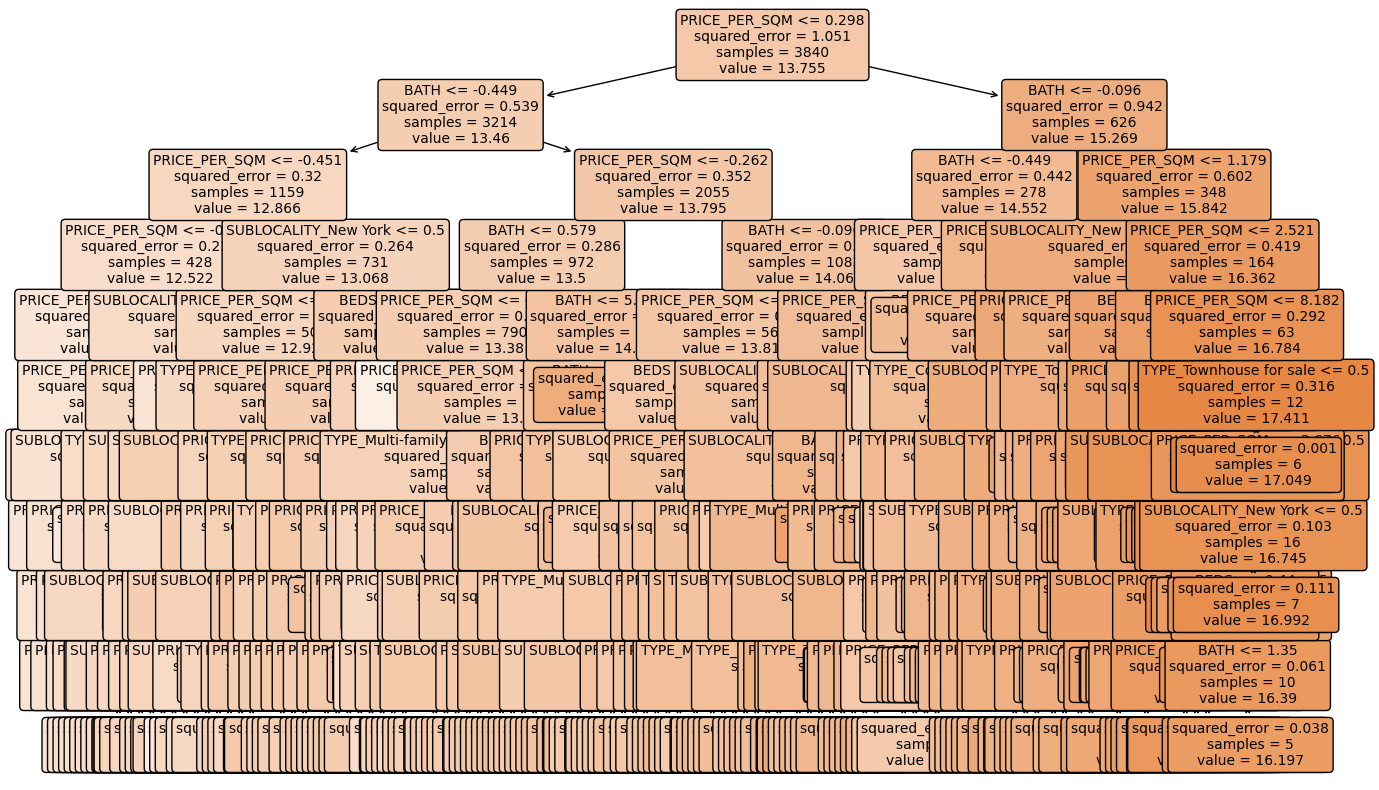

Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error of Best Decision Tree Model: 0.13631598684727905


In [53]:
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

tree_model = DecisionTreeRegressor()

grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_log)

best_params_tree = grid_search_tree.best_params_

best_model_tree = grid_search_tree.best_estimator_
predictions_best_tree = best_model_tree.predict(X_test)

mse_best_tree = mean_squared_error(y_log_test, predictions_best_tree)

best_tree_model = grid_search_tree.best_estimator_

plt.figure(figsize=(15, 10))
tree.plot_tree(best_tree_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.show()

print("Best Hyperparameters for Decision Tree:", best_params_tree)
print("Mean Squared Error of Best Decision Tree Model:", mse_best_tree)

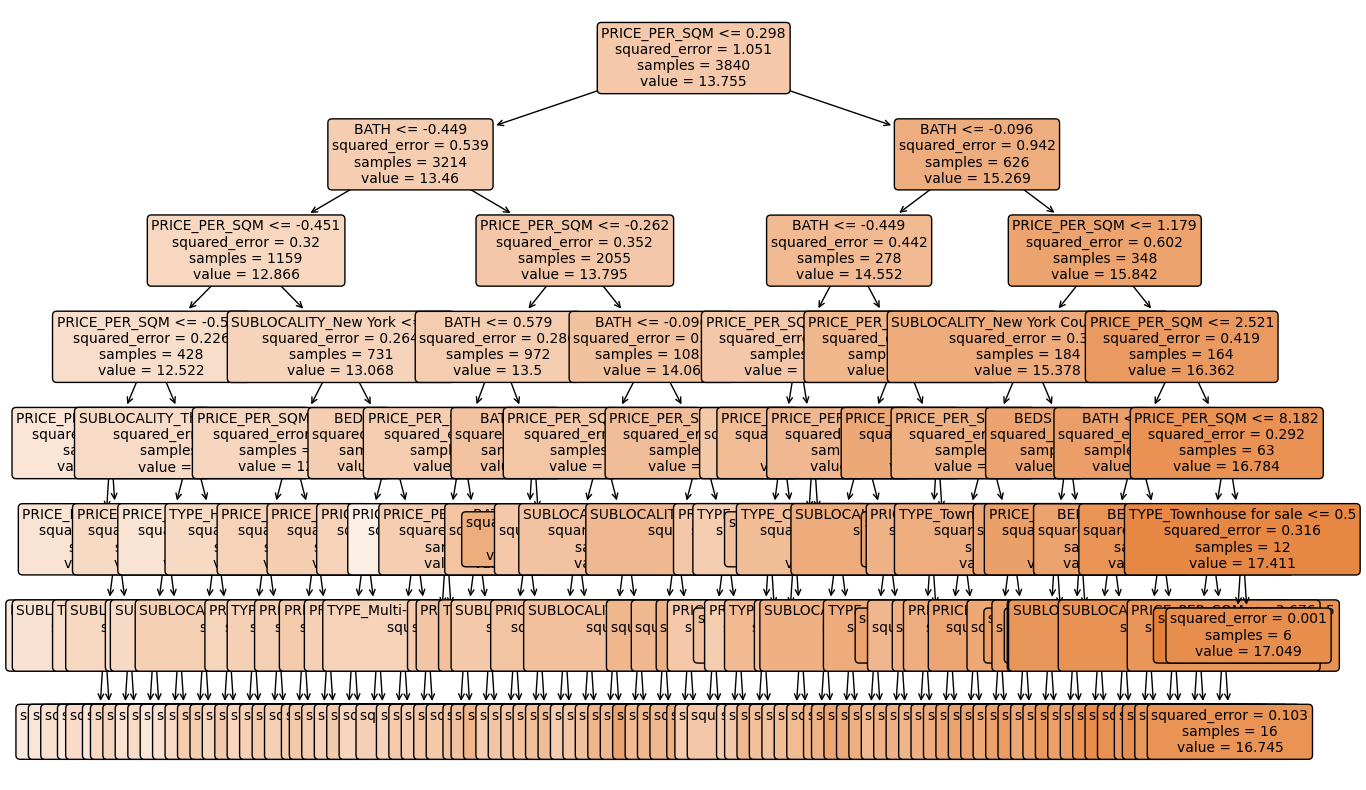

Best Hyperparameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Squared Error of Best Decision Tree Model: 0.14315102919511424


In [54]:
param_grid = {'max_depth': [2, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

tree_model = DecisionTreeRegressor()

grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_log)

best_params_tree = grid_search_tree.best_params_

best_model_tree = grid_search_tree.best_estimator_
predictions_best_tree = best_model_tree.predict(X_test)

mse_best_tree = mean_squared_error(y_log_test, predictions_best_tree)

best_tree_model = grid_search_tree.best_estimator_

plt.figure(figsize=(15, 10))
tree.plot_tree(best_tree_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.show()

print("Best Hyperparameters for Decision Tree:", best_params_tree)
print("Mean Squared Error of Best Decision Tree Model:", mse_best_tree)

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf_model = RandomForestRegressor()

# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_log)

# Get the best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_

# Print the best parameters for Random Forest
print("Best Hyperparameters for Random Forest:", best_rf_params)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the Random Forest model on the test set
predictions_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_log_test, predictions_rf)

print("Mean Squared Error of Random Forest Model:", mse_rf)

# Print feature importances
feature_importances = best_rf_model.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort features by importance in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importances
print("\nFeature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error of Random Forest Model: 0.1086212307664323

Feature Importances:
PRICE_PER_SQM: 0.6419131474812215
BATH: 0.26786659514884026
BEDS: 0.028427214836138023
SUBLOCALITY_New York: 0.013211374006298652
SUBLOCALITY_New York County: 0.009015366579504818
TYPE_Multi-family home for sale: 0.0062224061406028885
TYPE_House for sale: 0.0053150122432352636
SUBLOCALITY_The Bronx: 0.0044030715912980805
TYPE_Condo for sale: 0.003815551126779807
TYPE_Townhouse for sale: 0.002947123210244045
SUBLOCALITY_Richmond County: 0.002633238242352495
SUBLOCALITY_Brooklyn: 0.0024069902782271227
SUBLOCALITY_Kings County: 0.0023153354158392623
SUBLOCALITY_Queens County: 0.0022283132462849907
TYPE_Pending: 0.001791809653020108
SUBLOCALITY_Queens: 0.0015681367581634577
TYPE_For sale: 0.0013818800409059544
SUBLOCALITY_Manhattan: 0.0006929267018737764
SUBLOCALITY_Staten Island: 0.